In [2]:
#NOME: Renan Palomino Granusso

#1 - Exibir o total de linhas e colunas
import pandas as pd
import seaborn as sb
low_memory=False
%matplotlib inline
pd.options.display.max_columns = 80
pd.options.display.max_rows = 90

filename = 'Leitos_de_UTI_em_2019.csv'
df = pd.read_csv(filename)
df.shape

(5570, 12)

In [3]:
#2 - Descrever o nome de todas as colunas
low_memory=False
%matplotlib inline
pd.options.display.max_columns = 80
pd.options.display.max_rows = 90

df = pd.read_csv(filename)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   OBJECTID                       5570 non-null   int64  
 1   GR                             5570 non-null   object 
 2   Nome_Estado                    5570 non-null   object 
 3   Codigo_Municipio               5570 non-null   int64  
 4   Nome_municipio                 5570 non-null   object 
 5   Pop_Total                      5570 non-null   int64  
 6   Leitos_UTI_Total               5570 non-null   int64  
 7   Leitos_UTI_100mil_hab_Ind      5570 non-null   float64
 8   Leitos_UTI_SUS_Total           5570 non-null   int64  
 9   Leitos_UTI_SUS_100mil_hab_Ind  5570 non-null   float64
 10  Shape__Area                    5570 non-null   float64
 11  Shape__Length                  5570 non-null   float64
dtypes: float64(4), int64(5), object(3)
memory usage:

In [4]:
#3 - Agrupar os Leitos de UTI
low_memory=False
%matplotlib inline
pd.options.display.max_columns = 80
pd.options.display.max_rows = 90
df = pd.read_csv(filename)
df.groupby('Leitos_UTI_Total').size().sort_values()

Leitos_UTI_Total
73        1
174       1
171       1
168       1
167       1
       ... 
7        19
8        23
20       36
10      137
0      5034
Length: 128, dtype: int64

TOTAL DE CIDADES NO BRASIL: 5570

TOTAL DE CIDADES NO BRASIL SEM LEITOS DE UTI = 0: 5034

TOTAL DE CIDADES NO BRASIL COM LEITOS DE UTI = 0: 536


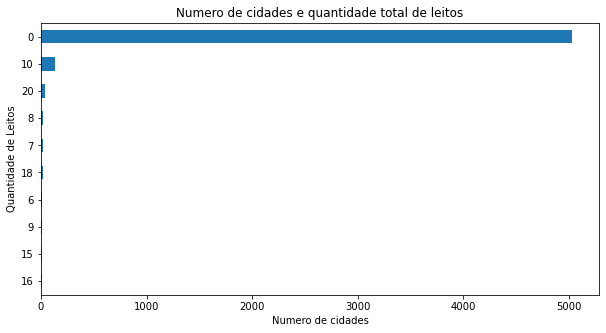

In [5]:
# 4 Filtrar Total de cidades com Leitos de UTI = 0
low_memory=False
%matplotlib inline
pd.options.display.max_columns = 80
pd.options.display.max_rows = 90
df = pd.read_csv(filename)
df.groupby('Leitos_UTI_Total').size().sort_values()

#Contar o total de cidades com leito de UTI = 0
seriesObj = df.apply(lambda x: True if x['Leitos_UTI_Total'] == 0 else False , axis=1)
Numero_sem_leitos = len(seriesObj[seriesObj == True].index)

#Contar total de Cidades com leito de UTI != 0
seriesObj = df.apply(lambda x: True if x['Leitos_UTI_Total'] != 0 else False , axis=1)
Numero_com_leitos= len(seriesObj[seriesObj == True].index)

#Total de cidades com leitos de UTI = 0 em comparação a outras que possuem leitos
Graf = df.groupby('Leitos_UTI_Total').size().sort_values().tail(10).plot(title='Numero de cidades e quantidade total de leitos', kind='barh', figsize=(10,5))

#Definindo descrição do Eixo X do grafico
Graf.set_xlabel("Numero de cidades")

#Definindo descrição do Eixo Y do grafico
Graf.set_ylabel("Quantidade de Leitos")

index = df.index
number_of_rows = len(index)

print("TOTAL DE CIDADES NO BRASIL: %d" %number_of_rows)
print("")
print("TOTAL DE CIDADES NO BRASIL SEM LEITOS DE UTI = 0: %d" %Numero_sem_leitos)
print("")
print("TOTAL DE CIDADES NO BRASIL COM LEITOS DE UTI = 0: %d" %Numero_com_leitos)

Comparação do número de cidades sem lleitos de UTI por regiões do Brasil


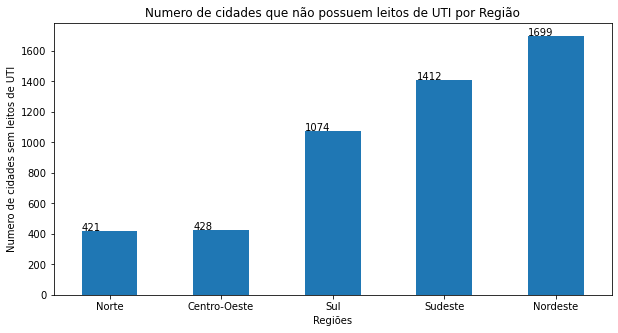

In [6]:
#5 Filtrando total de cidades que não possuem leito de UTI por região

low_memory=False
%matplotlib inline
pd.options.display.max_columns = 80
pd.options.display.max_rows = 90

df = df[df.Leitos_UTI_Total == 0]

ax = df.groupby('GR').size().sort_values().tail(10).plot(title='Numero de cidades que não possuem leitos de UTI por Região', kind='bar', figsize=(10,5), rot=0)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x(), p.get_height()))
    

#Definindo descrição do Eixo X do grafico
ax.set_xlabel("Regiões")

#Definindo descrição do Eixo Y do grafico
ax.set_ylabel("Numero de cidades sem leitos de UTI")

print("Comparação do número de cidades sem lleitos de UTI por regiões do Brasil")


Comparação do número de cidades sem lleitos de UTI por Estados do Brasil


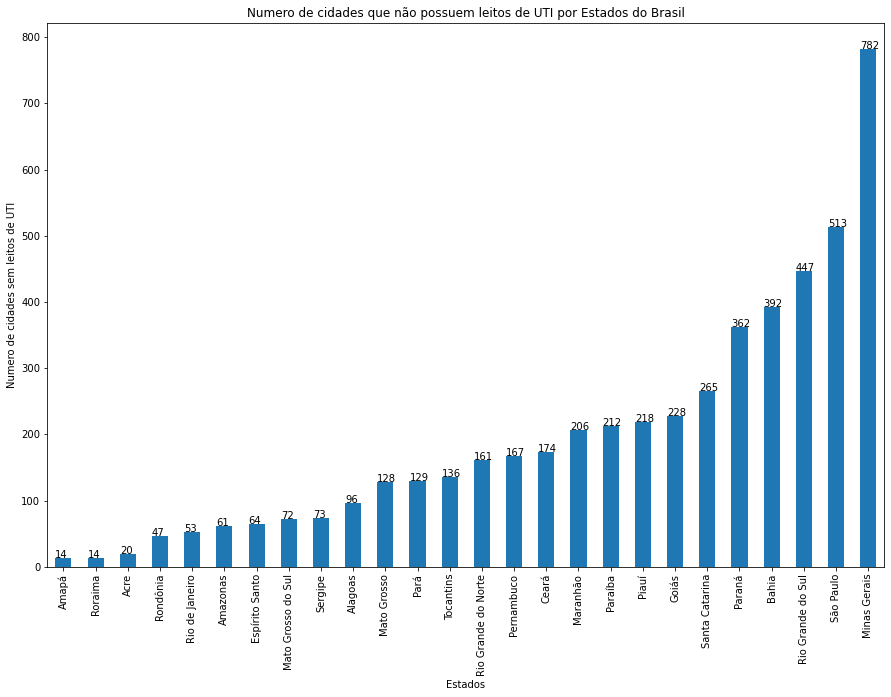

In [7]:
#6 Filtrando total de cidades que não possuem leito de UTI por Estado

low_memory=False
%matplotlib inline
pd.options.display.max_columns = 80
pd.options.display.max_rows = 90


df = df[df.Leitos_UTI_Total == 0]

ax = df.groupby('Nome_Estado').size().sort_values().tail(28).plot(title='Numero de cidades que não possuem leitos de UTI por Estados do Brasil', kind='bar', figsize=(15,10))

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x(), p.get_height()))
    

#Definindo descrição do Eixo X do grafico
ax.set_xlabel("Estados")

#Definindo descrição do Eixo Y do grafico
ax.set_ylabel("Numero de cidades sem leitos de UTI")

print("Comparação do número de cidades sem lleitos de UTI por Estados do Brasil")